In [1]:
!git clone https://github.com/ryanzhumich/AESLC

Cloning into 'AESLC'...
remote: Enumerating objects: 17469, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 17469 (delta 1), reused 0 (delta 0), pack-reused 17461
Receiving objects: 100% (17469/17469), 7.36 MiB | 8.10 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Updating files: 100% (18304/18304), done.


In [2]:
#!ls
!ls AESLC/enron_subject_line

dev  test  train


In [3]:
train_path = './AESLC/enron_subject_line/train'
val_path = './AESLC/enron_subject_line/dev'
test_path = './AESLC/enron_subject_line/test'

In [2]:
import pandas as pd
import os

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
df = pd.DataFrame(columns=["Email", "Subject"])

for filename in os.listdir(train_path):
    with open(os.path.join(train_path,filename)) as f:
        content = f.read().split('@subject\n')
        df = pd.concat([df, pd.DataFrame.from_records([{"Email": content[0], "Subject": content[1]}])], ignore_index = True)

df

,Email,Subject
0,I am not sure if it is premature and there is ...,Dynegy Merger - Canadian Counsel
1,"Shmuel, This is the abstract for my present...",Abstract
2,This message is only relevant for those going ...,>>>>READ! UBS EMAIL MIGRATION<<<<
3,"Gerald, Please comment on section 1.6 of the ...",Revised Confirm
4,Currently the curves are being published into ...,Updating Curve Files to New Environment
...,...,...
14431,Could you please extend the guest id that expi...,FTEnergy
14432,"At the request of Paul Finken, I am attaching ...","NDA-Purchase Pooling, Inc."
14433,Rod: And what lawyer is handling this in your...,CAPEX
14434,Attached is the letter agreement which extende...,Aera Confidentiality


In [16]:
import re

In [8]:
df_val = pd.DataFrame(columns=["Email", "Subject", "Ann0", "Ann1", "Ann2"])
delimiters = r'@subject\n|\n\n@ann0\n|\n\n@ann1\n|\n\n@ann2\n'
for filename in os.listdir(val_path):
    with open(os.path.join(val_path,filename)) as f:
        content_val = f.read()
        split_string = re.split(delimiters,content_val)
        df_val = pd.concat([df_val,pd.DataFrame.from_records([{"Email": split_string[0], "Subject": split_string[1], "Ann0" : split_string[2], "Ann1" : split_string[3], "Ann2" : split_string[4]}])], ignore_index = True)

df_val

,Email,Subject,Ann0,Ann1,Ann2
0,Phil Richardson and Sarah Tomalty of Dynegy sa...,PNM tech. conference,updates re potential withdrawal of dynegy protest,prevent tw from becoming a broker for another ...,withdraw of protest possibility and proposed t...
1,Richard Sanders has asked us to revise the arb...,Omnibus Revisions?,arbitration language,"input sought for revisions on forms, including...",revisions to the annex
2,"MARKET NOTICE November 6, 2001 Market Surveill...",CAISO NOTICE: Market Surveillance Committee N...,market notice,market surveillance committee nominations and ...,committe nominations and selection process
3,It is my sincere honor to once again lead the ...,Important Message,jdrf walk on oct. 18th,opportunities to help the juvenile diabetes re...,join the enron team for the jdrf walk
4,Kim: Thanks for your call.\nLegal received cr...,Tuscon Electric Power Company,updates on tucson agreement,isda agreement,credit for tuscon/isda agreement
...,...,...,...,...,...
1955,This is a reminder that your QBR has been sche...,QBR,your qbr,qbr scheduled for oct. 23 2000 - conf. room 3321,reminder! please be prepared
1956,Estimation of Bankruptcy Probabilities Using B...,Estimation of Bankruptcy Probabilities Using B...,bayesian approach to bankruptcy probabilities,proportional hazard model details,bankruptcy probability estimation
1957,"Robin, Attached is the final version of the ...",Master firm Gas Purchase/Sale Agreement,the final version of the master agreement,master agreement final version requires signature,final version of the master agreement
1958,CMS Energy (Bill Grygar and Kim Van Pelt) are ...,NOPR (RM96-1-019),do pipelines want to meet to discuss the nopr?,response requested: cms energy meeting request,cms pipeline information needed


In [9]:
df_test = pd.DataFrame(columns=["Email", "Subject", "Ann0", "Ann1", "Ann2"])
for filename in os.listdir(test_path):
    with open(os.path.join(test_path,filename)) as f:
        content_test = f.read()
        split_string = re.split(delimiters,content_test)
        df_test = pd.concat([df_test,pd.DataFrame.from_records([{"Email": split_string[0], "Subject": split_string[1], "Ann0" : split_string[2], "Ann1" : split_string[3], "Ann2" : split_string[4]}])], ignore_index = True)

df_test

,Email,Subject,Ann0,Ann1,Ann2
0,Happy new year to all!\nAttached is the money ...,Money market rates for 01/07/02,money market list,money market list,yesterday's money market list
1,"Chris, Per your request, I have included the ...",BPA Contracts,bpa contracts,current information on the bpa contracts,information on the bpa contracts
2,"Gregg, Attached are my suggested changes to ...",PESC Confidentiality Agreement,confidentiality agreement changes,revised confidentiality agreement,changes to confidentiality agreement
3,"Thursday, May 10 at 10 a.m. Houston time, join...",eThink About It: 5/7/01,billy lemmons on espeak invitation,submit questions for open mike event,may 10 espeak session with billy lemons
4,I understand that you may be in the Houston of...,Brazilian Trading,houston staff this week contact me about south...,can we meet this week re: sa legal staffing?,request a meeting about about south american s...
...,...,...,...,...,...
1901,The information contained herein is based on s...,commitment of traders 5/21,carr futures adobe acrobat reader disclaimer,abode terms and conditions,2001 carr futures chart available
1902,Attached is the updated scores.\nPlease check ...,Pool Update,"updated scores attached, please verify accurac...",check updated scores,updated sports scores pool
1903,take a look at the saturday weather forecast f...,when you have a second,saturday forecast for new orleans,saturday weather forecast for new orleans,upcoming weather forecast
1904,"Hello Everyone, Well, I looked around again ...",Ski Trip 2002,ski trip specifics - reply by wednesday,inexpensive ski trip reservations,regarding our ski trip!


In [11]:
df.to_csv(r'train.csv')
df_val.to_csv(r'val.csv')
df_test.to_csv(r'test.csv')

In [12]:
!ls

AESLC  sample_data  test.csv  train.csv  val.csv


In [17]:
import numpy as np

In [14]:
narray = df.to_numpy()
length_checker = np.vectorize(len)

arr_len = length_checker(narray)

arr_len

array([[ 431,   32],
       [ 314,    8],
       [ 305,   33],
       ...,
       [ 169,    5],
       [ 234,   20],
       [1161,   38]])

In [15]:
narray_val = df_val.to_numpy()
arr_len_val = length_checker(narray_val)

arr_len_val

array([[ 638,   20,   49,   54,   90],
       [ 434,   18,   20,   63,   22],
       [1271,   79,   13,   63,   42],
       ...,
       [ 338,   39,   41,   49,   37],
       [ 539,   17,   46,   46,   31],
       [ 830,   17,   17,   46,   53]])

In [16]:
narray_test = df_test.to_numpy()
arr_len_test = length_checker(narray_test)

arr_len_test

array([[ 146,   31,   17,   17,   29],
       [1161,   13,   13,   40,   32],
       [ 272,   30,   33,   33,   36],
       ...,
       [ 278,   22,   33,   41,   25],
       [1849,   13,   39,   33,   23],
       [2596,   35,   33,   21,   16]])

In [17]:
print(np.mean(arr_len, axis = 0))
print(np.mean(arr_len_val, axis = 0))
print(np.mean(arr_len_test, axis = 0))

[790.94444444  26.19278193]
[811.65306122  27.27908163  30.85153061  32.89234694  31.94540816]
[690.8683106   26.97219307  32.62329486  33.64742917  33.27701994]


In [18]:
print(np.median(arr_len, axis = 0))
print(np.median(arr_len_val, axis = 0))
print(np.median(arr_len_test, axis = 0))

[425.  23.]
[443.  23.  28.  30.  29.]
[451.  24.  30.  32.  31.]


In [19]:
df_length = pd.DataFrame(arr_len, columns = ["Email Length", "Subject Length"])
df_length

,Email Length,Subject Length
0,431,32
1,314,8
2,305,33
3,238,15
4,865,39
...,...,...
14431,193,8
14432,308,26
14433,169,5
14434,234,20


In [20]:
df_val_length = pd.DataFrame(arr_len_val, columns = ["Email Length", "Subject Length", "Ann0", "Ann1", "Ann2"])
df_val_length

,Email Length,Subject Length,Ann0,Ann1,Ann2
0,638,20,49,54,90
1,434,18,20,63,22
2,1271,79,13,63,42
3,2126,17,22,70,37
4,283,29,27,14,32
...,...,...,...,...,...
1955,319,3,8,48,29
1956,753,62,45,33,33
1957,338,39,41,49,37
1958,539,17,46,46,31


In [21]:
df_test_length = pd.DataFrame(arr_len_test, columns = ["Email Length", "Subject Length", "Ann0", "Ann1", "Ann2"])
df_test_length

,Email Length,Subject Length,Ann0,Ann1,Ann2
0,146,31,17,17,29
1,1161,13,13,40,32
2,272,30,33,33,36
3,318,23,34,36,39
4,389,17,77,44,60
...,...,...,...,...,...
1901,878,26,44,26,33
1902,487,11,62,20,26
1903,278,22,33,41,25
1904,1849,13,39,33,23


In [22]:
df_length.max(axis=0)

,0
Email Length,39003
Subject Length,117


In [23]:
df_length.min(axis=0)

,0
Email Length,94
Subject Length,1


[Text(0.5, 0, 'Number of Words'),
 Text(0, 0.5, 'Number of Emails'),
 Text(0.5, 1.0, 'Email Length Histogram')]

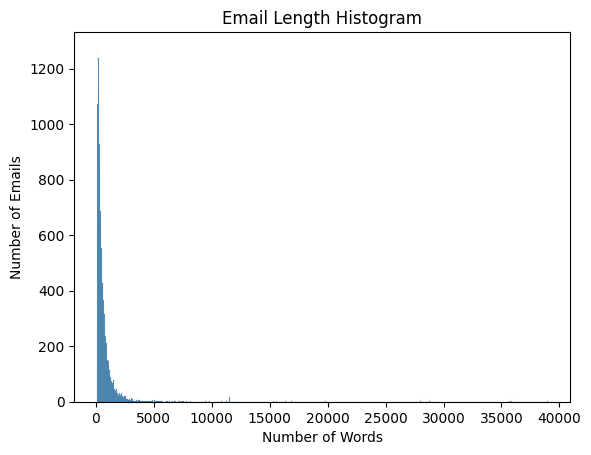

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.histplot(df_length['Email Length'])
ax.set(xlabel = "Number of Words", ylabel = "Number of Emails", title = "Email Length Histogram")

[Text(0.5, 0, 'Number of Words'),
 Text(0, 0.5, 'Number of Subjects'),
 Text(0.5, 1.0, 'Subject Length Histogram')]

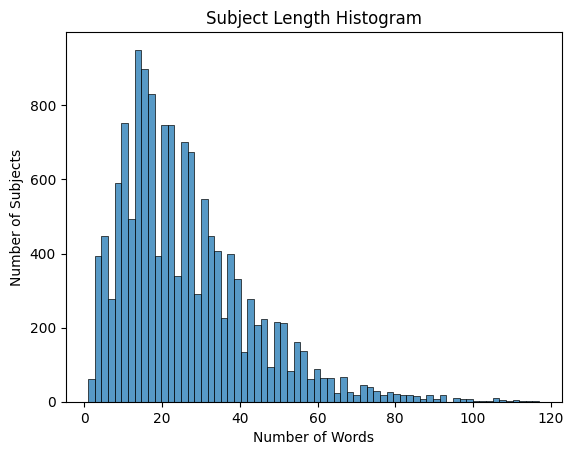

In [25]:
ax = sns.histplot(df_length['Subject Length'])
ax.set(xlabel = "Number of Words", ylabel = "Number of Subjects", title = "Subject Length Histogram")

[Text(0.5, 0, 'Number of Words'),
 Text(0, 0.5, 'Number of Subjects'),
 Text(0.5, 1.0, 'Subject Length Histogram')]

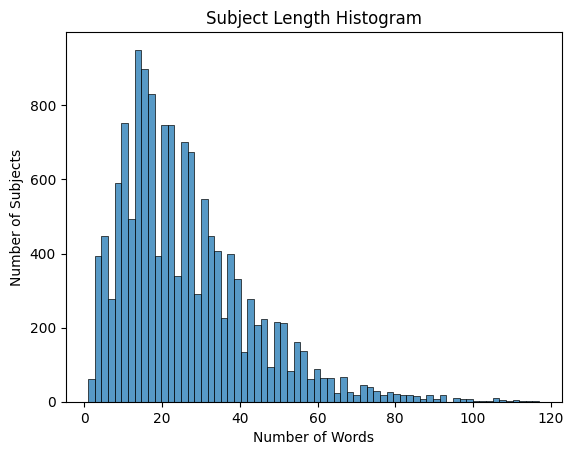

In [26]:
ax = sns.histplot(df_length['Subject Length'])
ax.set(xlabel = "Number of Words", ylabel = "Number of Subjects", title = "Subject Length Histogram")

[Text(0.5, 1.0, 'Correlation between Email Length and Subject Length')]

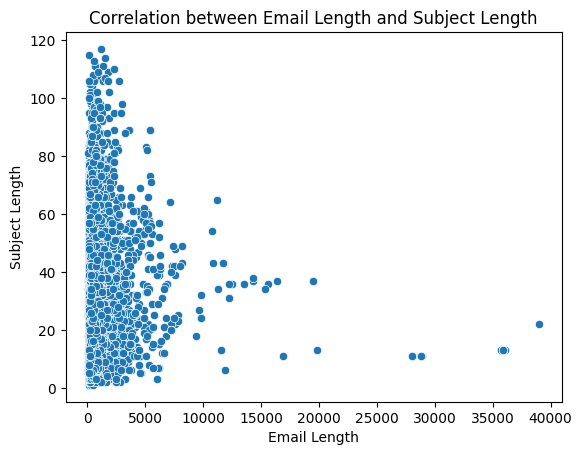

In [27]:
ax = sns.scatterplot(data=df_length, x="Email Length", y="Subject Length")
ax.set(title = "Correlation between Email Length and Subject Length")

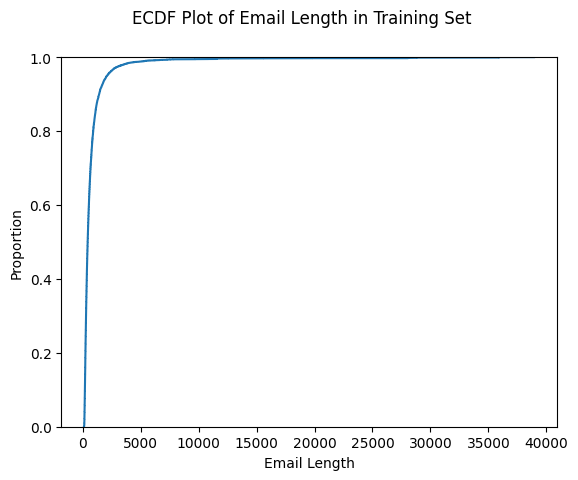

In [28]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Email Length in Training Set")
sns.ecdfplot(data=df_length, x=df_length['Email Length'])
plt.show()

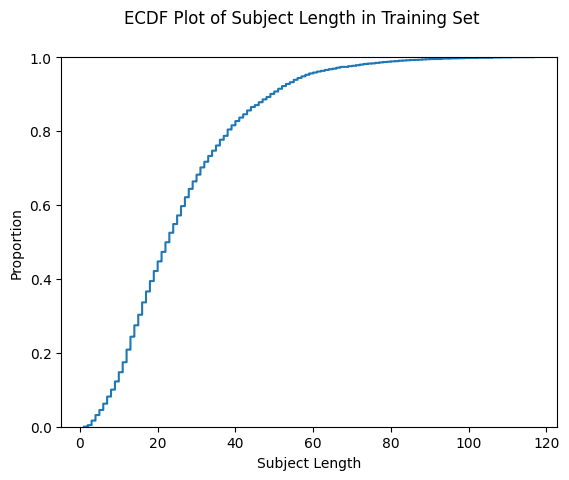

In [29]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Subject Length in Training Set")
sns.ecdfplot(data=df_length, x=df_length['Subject Length'])
plt.show()

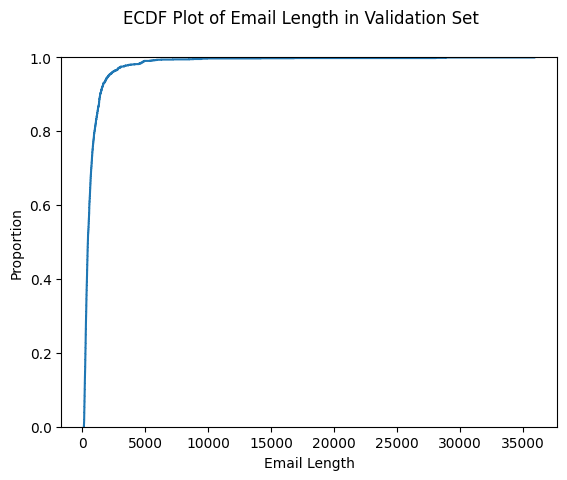

In [30]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Email Length in Validation Set")
sns.ecdfplot(data=df_val_length, x=df_val_length['Email Length'])
plt.show()

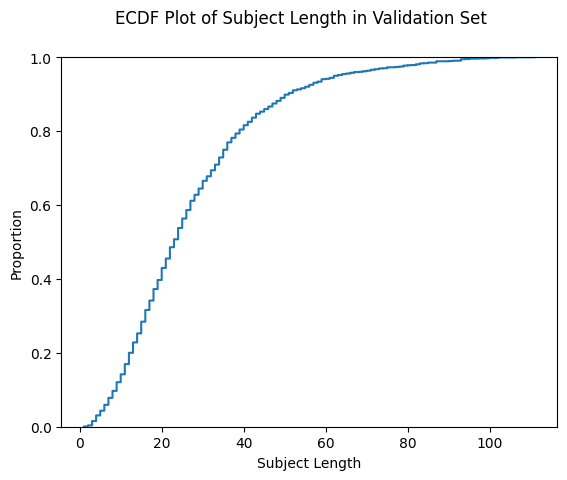

In [31]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Subject Length in Validation Set")
sns.ecdfplot(data=df_val_length, x=df_val_length['Subject Length'])
plt.show()

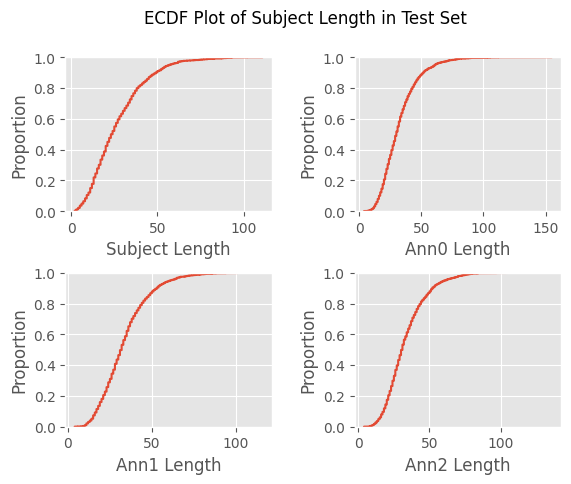

In [32]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Subject Length in Test Set")
plt.style.use('ggplot')
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.ecdfplot(data=df_test_length, x=df_test_length['Subject Length'])#,ax=ax)
ax.set(xlabel='Subject Length')
ax = fig.add_subplot(2, 2, 2)
sns.ecdfplot(data=df_test_length, x=df_test_length['Ann0'],ax=ax)
ax.set(xlabel='Ann0 Length')
ax = fig.add_subplot(2, 2, 3)
sns.ecdfplot(data=df_test_length, x=df_test_length['Ann1'],ax=ax)
ax.set(xlabel='Ann1 Length')
ax = fig.add_subplot(2, 2, 4)
sns.ecdfplot(data=df_test_length, x=df_test_length['Ann2'],ax=ax)
ax.set(xlabel='Ann2 Length')
plt.show()

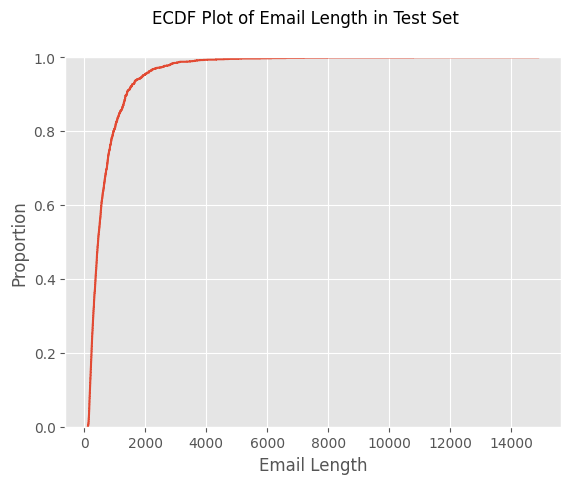

In [33]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Email Length in Test Set")
sns.ecdfplot(data=df_test_length, x=df_test_length['Email Length'])
plt.show()

In [34]:
!ls

AESLC  sample_data  test.csv  train.csv  val.csv


In [4]:
df = pd.read_csv("train.csv")
df_val = pd.read_csv("val.csv")
df_test = pd.read_csv("test.csv")

In [5]:
df_test.head()

,Unnamed: 0,Email,Subject,Ann0,Ann1,Ann2
0,0,Happy new year to all!\nAttached is the money ...,Money market rates for 01/07/02,money market list,money market list,yesterday's money market list
1,1,"Chris, Per your request, I have included the ...",BPA Contracts,bpa contracts,current information on the bpa contracts,information on the bpa contracts
2,2,"Gregg, Attached are my suggested changes to ...",PESC Confidentiality Agreement,confidentiality agreement changes,revised confidentiality agreement,changes to confidentiality agreement
3,3,"Thursday, May 10 at 10 a.m. Houston time, join...",eThink About It: 5/7/01,billy lemmons on espeak invitation,submit questions for open mike event,may 10 espeak session with billy lemons
4,4,I understand that you may be in the Houston of...,Brazilian Trading,houston staff this week contact me about south...,can we meet this week re: sa legal staffing?,request a meeting about about south american s...


In [6]:
print(df.Subject.map(lambda x: len(x)).max())
print(df_val.Subject.map(lambda x: len(x)).max())
print(df_test.Subject.map(lambda x: len(x)).max())

117
111
111


In [38]:
!pip install -U transformers[torch]
!pip install -U huggingface_hub
! pip install evaluate
!pip install sacrebleu
!pip install rouge_score
!pip install -U nltk
#!pip install bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=ab80b6c5d440c887e3cc02d31d35e9f6e7567a6430112e73f13bc4100320a56e
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.8 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [7]:
import torch
from torch.utils.data import Dataset, random_split, DataLoader
from transformers import GPT2Tokenizer, TrainingArguments, Trainer, GPT2LMHeadModel, DataCollatorForLanguageModeling #Seq2SeqTrainingArguments, Seq2SeqTrainer
import accelerate
import evaluate
#import bitsandbytes
from torch import nn
from transformers.trainer_pt_utils import get_parameter_names
import re

In [ ]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [8]:
sacrebleu = evaluate.load("sacrebleu")
rouge = evaluate.load("rouge")
meteor = evaluate.load("meteor")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [9]:
torch.manual_seed(42)

In [10]:
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2', bos_token='<|startoftext|>',
                                          eos_token='<|endoftext|>', pad_token='<|pad|>', sep_token='<|sep|>')
model = GPT2LMHeadModel.from_pretrained('distilgpt2').cuda()
model.resize_token_embeddings(len(tokenizer))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Embedding(50260, 768)

In [11]:
datacollator = DataCollatorForLanguageModeling(tokenizer = tokenizer, mlm=False)

In [12]:
class EmailSubjectDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.input_ids = []
        self.attn_masks = []
        self.labels = []
        for index, row in data.iterrows():
            encodings_dict = tokenizer('<|startoftext|>' + row["Email"] + '<|sep|>' + row["Subject"] + '<|endoftext|>', truncation=True, max_length=250, padding="max_length", return_tensors='pt')
            self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
            self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx]

In [13]:
class ValEmailSubjectDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.input_ids = []
        self.attn_masks = []
        self.labels = []
        for index, row in data.iterrows():
          encodings_dict = tokenizer('<|startoftext|>' + row["Email"] + '<|sep|>', truncation=True, max_length=250, padding="max_length", return_tensors='pt')
          if((encodings_dict['input_ids'][0][249] != torch.Tensor(np.array([50259]))) and (encodings_dict['input_ids'][0][249] != torch.Tensor(np.array([50258])))):
            encodings_dict['input_ids'][0] = torch.cat((encodings_dict['input_ids'][0][np.r_[:249]],torch.Tensor(np.array([50258]))),0)
          self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
          self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx]

In [14]:
class TestEmailSubjectDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.input_ids = []
        self.attn_masks = []
        self.labels = []
        for index, row in data.iterrows():
          encodings_dict = tokenizer('<|startoftext|>' + row["Email"] + '<|sep|>', truncation=True, max_length=250, return_tensors='pt')
          self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
          self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx]

In [18]:
train_dataset = EmailSubjectDataset(df, tokenizer)
val_dataset = ValEmailSubjectDataset(df_val,tokenizer)

<ipython-input-12-b2797c85eddc>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
<ipython-input-12-b2797c85eddc>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))
<ipython-input-13-8a788ad2a56a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
<ipython-input-13-8a788ad2a56a>:11: UserWarning: To copy construct from a tensor, it is recommended

In [28]:
training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=15,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    #eval_steps = 2,
    eval_steps = 400,
    save_steps=800,
    warmup_steps=500,
    load_best_model_at_end=True,
    #evaluation_strategy="steps",
    #save_strategy = "steps",
    eval_strategy="epoch",
    save_strategy = "epoch",
    weight_decay=0.01,
    metric_for_best_model = "rougeL",
    gradient_accumulation_steps=4,
    gradient_checkpointing=True,
    fp16=True,
    logging_dir='./logs',
    logging_steps=500,
    report_to = 'none'
    )

In [29]:
def compute_metrics(eval_pred, eval_dataset, df):
    decoded_preds = []
    references = [df['Subject'], df['Ann0'], df['Ann1'], df['Ann2']]
    refs = []

    for i, sample_input in enumerate(eval_dataset):
        temp_input = sample_input[0][sample_input[0] !=torch.Tensor(np.array([50259]))]
        temp_input = temp_input[None, :]
        metric_outputs = model.generate(temp_input.cuda(), min_new_tokens = 4, max_new_tokens = 12, num_beams=5, early_stopping=True, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id)
        decoded_preds.append(tokenizer.decode(metric_outputs[0]))

    final_preds =[]
    for j in range(len(decoded_preds)):
        lst = decoded_preds[j].split('<|sep|>')
        if (len(lst) >= 2):
            final_preds.append(lst[1].replace("<|endoftext|>",""))
        temp_refs = []
        for k in range(len(references)):
            temp_refs.append(references[k][j])
        refs.append(temp_refs)

    results_sacrebleu = sacrebleu.compute(predictions=final_preds, references=refs, lowercase = True)

    results_rouge = rouge.compute(predictions=final_preds, references=refs)

    results_meteor = meteor.compute(predictions=final_preds, references=refs)

    return {'bleu': results_sacrebleu['score'], 'rouge1' : results_rouge['rouge1'], 'rouge2' : results_rouge['rouge2'], 'rougeL' : results_rouge['rougeL'], 'meteor' : results_meteor['meteor']}

In [30]:
def preprocess_logits_for_metrics(logits, labels):
    """
    Original Trainer may have a memory leak.
    This is a workaround to avoid storing too many tensors that are not needed.
    """
    pred_ids = torch.argmax(logits, dim=-1)
    return pred_ids, labels

In [31]:
trainer = Trainer(model=model, args=training_args, train_dataset=train_dataset, eval_dataset=val_dataset, data_collator=datacollator, compute_metrics = lambda pred: compute_metrics(pred, val_dataset, df_val), preprocess_logits_for_metrics = preprocess_logits_for_metrics)#, optimizers=(adam_bnb_optim, None))

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [26]:
#!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

In [32]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [33]:
trainer.train()

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Bleu,Rouge1,Rouge2,Rougel,Meteor
0,No log,3.635086,22.275357,0.396282,0.257464,0.387752,0.349411
1,9.029100,3.502780,25.557314,0.450736,0.291413,0.440516,0.391040
2,3.497900,3.452860,26.260277,0.453120,0.290963,0.443728,0.390699
4,3.229800,3.391281,25.545666,0.458376,0.291450,0.447598,0.397724
5,3.150500,3.382005,25.043569,0.445259,0.278428,0.435483,0.382040
6,3.072000,3.370845,24.800867,0.446951,0.282857,0.437950,0.388445
8,2.981300,3.362299,25.697474,0.449789,0.284316,0.441184,0.388667
9,2.934100,3.364068,25.153556,0.453883,0.286736,0.444161,0.392419
10,2.934100,3.367672,24.701893,0.448453,0.282733,0.438903,0.388467
12,2.880000,3.372470,24.452949,0.442268,0.276134,0.432714,0.380930


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the curre

TrainOutput(global_step=6765, training_loss=3.489920375511017, metrics={'train_runtime': 10082.3754, 'train_samples_per_second': 21.477, 'train_steps_per_second': 0.671, 'total_flos': 1.3806369128448e+16, 'train_loss': 3.489920375511017, 'epoch': 14.99168975069252})

In [34]:
test_dataset = TestEmailSubjectDataset(df_test,tokenizer)
len(test_dataset)

<ipython-input-14-fe53d240c21b>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
<ipython-input-14-fe53d240c21b>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))


1906

In [35]:
temp_output = []
for i, sample_input in enumerate(test_dataset):
    if(len(sample_input[0]) == 250 and sample_input[0][249] != torch.Tensor(np.array([50258]))):
        sample_input[0] = torch.cat((sample_input[0][np.r_[:249]],torch.Tensor(np.array([50258]))),0)
    sample_output = model.generate(sample_input.cuda(), min_new_tokens = 4, max_new_tokens = 12, num_beams=5, early_stopping=True, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id)
    temp_output.append(tokenizer.decode(sample_output[0]))
final_output =[]
for j in range(len(temp_output)):
    lst = temp_output[j].split('<|sep|>')
    if (len(lst) >= 2):
        final_output.append(lst[1].replace("<|endoftext|>",""))
    else:
        final_output.append("")

In [36]:
df_test["Generated"] = final_output
df_test.to_csv('generated.csv')

In [37]:
pred = df_test['Generated']
ref = [df_test['Subject'], df_test['Ann0'], df_test['Ann1'], df_test['Ann2']]

In [45]:
def score_evaluate(predictions, references):
    preds = []
    refs = []
    for i in range(len(predictions)):
        preds.append(predictions[i])
        temp_refs = []
        for j in range(len(references)):
            temp_refs.append(references[j][i])
        refs.append(temp_refs)
    results_sacrebleu = sacrebleu.compute(predictions=preds, references=refs, lowercase = True)
    print("Bleu Score : " + str(results_sacrebleu['score']))

    results_rouge = rouge.compute(predictions=preds, references=refs)
    print("Rouge1 Score : " + str(results_rouge['rouge1']))
    print("Rouge2 Score : " + str(results_rouge['rouge2']))
    print("RougeL Score : " + str(results_rouge['rougeL']))

    #results_meteor = meteor.compute(predictions=preds, references=refs)
    #print("Meteor Score : " + str(results_meteor['meteor']))

In [46]:
score_evaluate(pred,ref)

Bleu Score : 24.968295927022094
Rouge1 Score : 0.45980911399360747
Rouge2 Score : 0.29905488110120904
RougeL Score : 0.44848876147788597


In [59]:
def score_evaluate_meteor(predictions, references):
    preds = []
    refs = []
    for i in range(len(predictions)):
        preds.append(predictions[i])
        temp_refs = []
        for j in range(len(references)):
            temp_refs.append(references[j][i])
        refs.append(temp_refs)
    results_sacrebleu = sacrebleu.compute(predictions=preds, references=refs, lowercase = True)
    print("Bleu Score : " + str(results_sacrebleu['score']))

    results_rouge = rouge.compute(predictions=preds, references=refs)
    print("Rouge1 Score : " + str(results_rouge['rouge1']))
    print("Rouge2 Score : " + str(results_rouge['rouge2']))
    print("RougeL Score : " + str(results_rouge['rougeL']))

    results_meteor = meteor.compute(predictions=preds, references=refs)
    print("Meteor Score : " + str(results_meteor['meteor']))

In [60]:
score_evaluate_meteor(pred,ref)

Bleu Score : 24.968295927022094
Rouge1 Score : 0.45980911399360747
Rouge2 Score : 0.29905488110120904
RougeL Score : 0.44848876147788597
Meteor Score : 0.3980256706093334


In [40]:
model.save_pretrained("distilgpt2_email_subject_summarizer")
tokenizer.save_pretrained("distilgpt2_email_subject_summarizer")

('distilgpt2_email_subject_summarizer/tokenizer_config.json',
 'distilgpt2_email_subject_summarizer/special_tokens_map.json',
 'distilgpt2_email_subject_summarizer/vocab.json',
 'distilgpt2_email_subject_summarizer/merges.txt',
 'distilgpt2_email_subject_summarizer/added_tokens.json')

In [41]:
from huggingface_hub import notebook_login

In [42]:
notebook_login()

In [43]:
repo_name="distilgpt2_email_subject_summarizer"

model.push_to_hub(repo_name)
tokenizer.push_to_hub(repo_name)

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/kkasiviswanath/distilgpt2_email_subject_summarizer/commit/e7d1d71d3204c85cbcdec41ea4ee651830fb8366', commit_message='Upload tokenizer', commit_description='', oid='e7d1d71d3204c85cbcdec41ea4ee651830fb8366', pr_url=None, pr_revision=None, pr_num=None)

In [47]:
def clean_subject(response):
    print(response)
    lst = response.split('<|sep|>')
    if (len(lst) >= 2):
        response = lst[1].replace("<|endoftext|>","")
    return response

In [50]:
def generate_subject(email:str):
    prompt = f"<|startoftext|> {email} <|sep|>"
    input_ids = tokenizer(prompt, return_tensors='pt')['input_ids'].to(model.device)
    sample_outputs = model.generate(
        input_ids,
        min_new_tokens = 4,
        max_new_tokens = 12,
        num_beams=5,
        early_stopping=True,
        num_return_sequences=1,
        pad_token_id=tokenizer.eos_token_id)
    subject = clean_subject(tokenizer.decode(sample_outputs[0]))
    return subject

In [51]:
example_email = "The following reports have been waiting for your approval for more than 4 days.Please review.Owner: James W Reitmeyer Report Name: JReitmeyer 10/24/01 Days In Mgr.Queue: 5"
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> The following reports have been waiting for your approval for more than 4 days.Please review.Owner: James W Reitmeyer Report Name: JReitmeyer 10/24/01 Days In Mgr.Queue: 5 <|sep|>Expense Reports Awaiting Your Approval<|endoftext|>
Generated Subject: Expense Reports Awaiting Your Approval


In [52]:
example_email = "All,  The below Analyst & Associate recruiting dates require ENA participation at Manager level at above.In order to resource each of your departments it is important to have ENA's involvement and participation in the interviews and debrief sessions on Fantastic Friday and Super Saturday events.These de-brief sessions will allow you the opportunity to select candidates you wish to join your groups.The target  is to assign potential candidates to business units and departments from the outset.As ENA has the highest percentage of A&A rotating in its business unit, the participation of ENA at interview should reflect this.Therefore, please encourage your direct reports and managers to participate in the below events in order to secure candidates for your business area.Associate Recruiting:		Saturday November 3						Total - 70 Candidates for Interview Analyst Recruiting:		Friday, November 16						Total - 70 Candidates for Interivew Associate Recruiting:		Saturday, December 1						Total - 70 Candidates for Interview  The above spreadsheet represents ENA's particpation today which I believe highlights the need for much additional support in these efforts.Please confirm by return participation of your respective groups.Regards,"
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> All,  The below Analyst & Associate recruiting dates require ENA participation at Manager level at above.In order to resource each of your departments it is important to have ENA's involvement and participation in the interviews and debrief sessions on Fantastic Friday and Super Saturday events.These de-brief sessions will allow you the opportunity to select candidates you wish to join your groups.The target  is to assign potential candidates to business units and departments from the outset.As ENA has the highest percentage of A&A rotating in its business unit, the participation of ENA at interview should reflect this.Therefore, please encourage your direct reports and managers to participate in the below events in order to secure candidates for your business area.Associate Recruiting:		Saturday November 3						Total - 70 Candidates for Interview Analyst Recruiting:		Friday, November 16						Total - 70 Candidates for Interivew Associate Recruiting:		Saturday, December 

In [53]:
example_email = "Late on October 25th, we received information about a nonspecific threat to the Enron Center.We communicated with law enforcement officials who found the threat unsubstantiated and without merit.Nonetheless we take all threats seriously and have increased the security presence at the Enron Center still further.Once again, if you observe suspicious behavior, please call security at 3-6200."
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> Late on October 25th, we received information about a nonspecific threat to the Enron Center.We communicated with law enforcement officials who found the threat unsubstantiated and without merit.Nonetheless we take all threats seriously and have increased the security presence at the Enron Center still further.Once again, if you observe suspicious behavior, please call security at 3-6200. <|sep|>Enron Center Security<|endoftext|>
Generated Subject: Enron Center Security


In [54]:
example_email = "Thanks in advance for agreeing to speak at the Global Operations Controller  Forum.There will be approximately 30 Enron business controllers present at  the meeting.All have responsibility for mid and back office operations for  the following Enron entities:  Enron North America, Enron Europe, Enron South  America, Enron Global Markets, Enron Industrial Markets, Enron Broadband  Services and Enron Energy Services.Attendees will be here from Houston,  Calgary, Tokyo, Sydney, London and New York (metals business).Attached for your reference is the agenda.There may be some slight changes  before the forum begins, but this will give you a good idea of the topics to  be covered and the other speakers who will address the group.You are scheduled to address the group as follows:"
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> Thanks in advance for agreeing to speak at the Global Operations Controller  Forum.There will be approximately 30 Enron business controllers present at  the meeting.All have responsibility for mid and back office operations for  the following Enron entities:  Enron North America, Enron Europe, Enron South  America, Enron Global Markets, Enron Industrial Markets, Enron Broadband  Services and Enron Energy Services.Attendees will be here from Houston,  Calgary, Tokyo, Sydney, London and New York (metals business).Attached for your reference is the agenda.There may be some slight changes  before the forum begins, but this will give you a good idea of the topics to  be covered and the other speakers who will address the group.You are scheduled to address the group as follows: <|sep|>Global Operations Controller Forum<|endoftext|>
Generated Subject: Global Operations Controller Forum


In [55]:
example_email = "To confirm:  Mark Thomas Mike Presley  both previously on the list for Netco's Market Risk/Research Group have resigned.I'm combing the Estate for replacements.DP"
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> To confirm:  Mark Thomas Mike Presley  both previously on the list for Netco's Market Risk/Research Group have resigned.I'm combing the Estate for replacements.DP <|sep|>Resignations for Mark Thomas Mike Presley<|endoftext|>
Generated Subject: Resignations for Mark Thomas Mike Presley


In [56]:
example_email = "Michelle;  This is the presentation which was provided to the HR VP's.The HR VPs were tasked with going off to met their BU OTCs and devise plans around the three components.We are currently collating those plans into one document.We'll send that along to you when completed.Pls call if you have any questions."
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> Michelle;  This is the presentation which was provided to the HR VP's.The HR VPs were tasked with going off to met their BU OTCs and devise plans around the three components.We are currently collating those plans into one document.We'll send that along to you when completed.Pls call if you have any questions. <|sep|>HR VP's Presentation<|endoftext|>
Generated Subject: HR VP's Presentation


In [57]:
example_email = """
All: Attached you will find a list that reflects your seat assignments for Business Continuity Planning (BCP).
These seats are located on the 30th and 31st Floors of Enron Center North (ECN).
As previously communicated, you will report to these designated seats in the event of an outage in ECS.
The exception to this is as follows: If your seat assignment is located on the 31st Floor, you will report to your original location that you occupied prior to your move into ECS.
This will hold true until the Monday after Thanksgiving, as we will have the 31st floor seats set up at that time.
Testing: Once you have moved to ECS, if you would like to test your BCP location, you will be able to test your seat for functionality every Thursday from 3-6pm.
Testing is not required, but is highly recommended.
If anyone has any questions or concerns about these procedures, please feel free to contact me at any time.
Regards,

@subject
BCP Seat Assignments

@ann0
your seat assignments for business continuity planning (bcp).

@ann1
bcp seat assignments

@ann2
here are your seat assignments for the business continuity planning event
"""
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> 
All: Attached you will find a list that reflects your seat assignments for Business Continuity Planning (BCP).
These seats are located on the 30th and 31st Floors of Enron Center North (ECN).
As previously communicated, you will report to these designated seats in the event of an outage in ECS.
The exception to this is as follows: If your seat assignment is located on the 31st Floor, you will report to your original location that you occupied prior to your move into ECS.
This will hold true until the Monday after Thanksgiving, as we will have the 31st floor seats set up at that time.
Testing: Once you have moved to ECS, if you would like to test your BCP location, you will be able to test your seat for functionality every Thursday from 3-6pm.
Testing is not required, but is highly recommended.
If anyone has any questions or concerns about these procedures, please feel free to contact me at any time.
Regards,

@subject
BCP Seat Assignments

@ann0
your seat assignments f

In [61]:
from transformers import pipeline

# Initialize the pipeline
pipe = pipeline("text-generation", model="kkasiviswanath/distilgpt2_email_subject_summarizer")

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/999k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/71.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [65]:

def generate_subject(email: str):
    prompt = f"<|startoftext|> {email} <|sep|>"

    # Use the pipeline to generate the text
    sample_outputs = pipe(prompt, max_new_tokens=12, num_beams=5, early_stopping=True, num_return_sequences=1)

    # The pipeline output is a list of dictionaries, so extract the generated text
    subject = clean_subject(sample_outputs[0]['generated_text'])
    return subject

def clean_subject(response):
    print(response)
    lst = response.split('<|sep|>')
    if (len(lst) >= 2):
        response = lst[1].replace("<|endoftext|>","")
    return response

# Example email
example_email = "The following reports have been waiting for your approval for more than 4 days. Please review. Owner: James W Reitmeyer Report Name: JReitmeyer 10/24/01 Days In Mgr.Queue: 5"

# Generate subject
generated_subject_res = generate_subject(example_email)
print("Generated Subject:", generated_subject_res)

<|startoftext|> The following reports have been waiting for your approval for more than 4 days. Please review. Owner: James W Reitmeyer Report Name: JReitmeyer 10/24/01 Days In Mgr.Queue: 5 <|sep|>Expense Reports Awaiting Your Approval
Generated Subject: Expense Reports Awaiting Your Approval


In [1]:
from transformers import pipeline

# Initialize the pipeline
pipe = pipeline("text-generation", model="kkasiviswanath/distilgpt2_email_subject_summarizer")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/999k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/71.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [7]:
import torch

In [11]:

# def generate_subject(email: str):
#     prompt = f"<|startoftext|> {email} <|sep|>"
#     input_ids = pipe.tokenizer(prompt, return_tensors='pt')['input_ids']
#     device = 'cuda' if torch.cuda.is_available() else 'cpu'
#     input_ids = input_ids.to(device)
#     pipe.model.to(device)
#     sample_outputs = pipe( input_ids=input_ids, min_new_tokens = 4, max_new_tokens=12, num_beams=5, early_stopping=True, num_return_sequences=1)

#     # The pipeline output is a list of dictionaries, so extract the generated text
#     generated_text = tokenizer.decode(sample_outputs[0], skip_special_tokens=True)
#     subject = clean_subject(generated_text)
#     return subject

# def clean_subject(response):
#     print(response)
#     lst = response.split('<|sep|>')
#     if (len(lst) >= 2):
#         response = lst[1].replace("<|endoftext|>","")
#     return response

# # Example email
# example_email = "The following reports have been waiting for your approval for more than 4 days. Please review. Owner: James W Reitmeyer Report Name: JReitmeyer 10/24/01 Days In Mgr.Queue: 5"

# # Generate subject
# generated_subject_res = generate_subject(example_email)
# print("Generated Subject:", generated_subject_res)